In [130]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

%matplotlib inline

In [2]:
avocado_mean = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-sedelkin/practice/data/6_avocado_mean.csv',
                           index_col=0, squeeze=True, parse_dates=['Date'])

In [3]:
avocado_mean.head()

Date
2015-01-04    1.301296
2015-01-11    1.370648
2015-01-18    1.391111
2015-01-25    1.397130
2015-02-01    1.247037
Name: AveragePrice, dtype: float64

In [6]:
avocado_mean.rolling(3).mean().max().round(2)

1.85

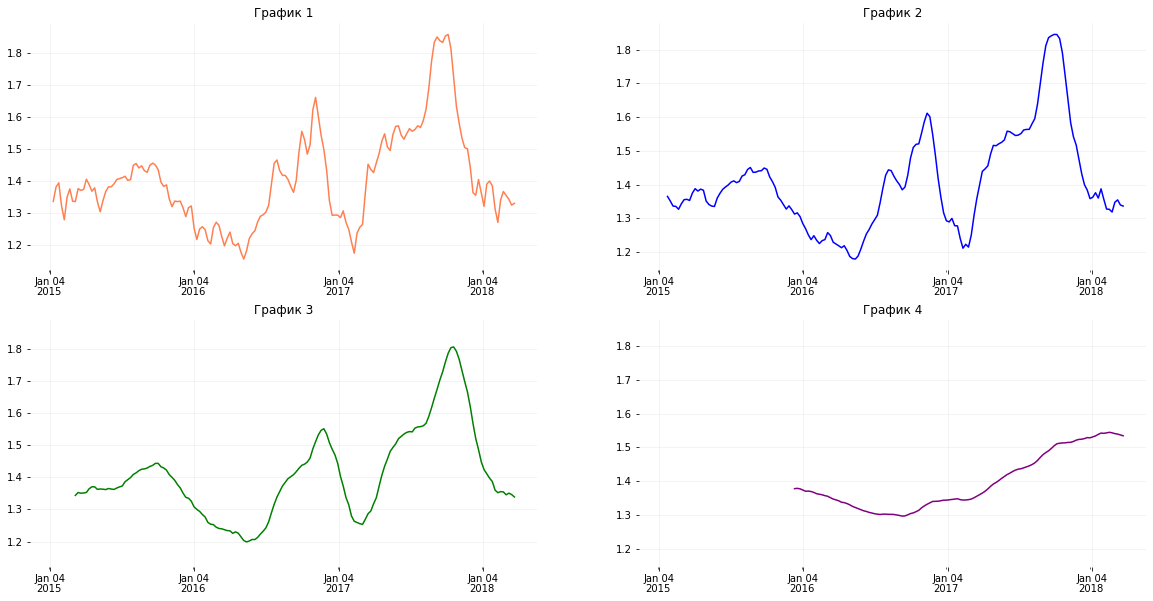

In [67]:
# Setting up complex linechart in a matrix of 4 windows

import matplotlib.dates as mdates

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10), sharey='col', sharex=True)

windows = [2, 4, 10, 50]
colors = ['coral', 'blue', 'green', 'purple']

for window, ax, color in zip(windows, axes.flatten(), colors): 
    ax.plot(avocado_mean.rolling(window=window).mean(), label=window, color=color)
    
for ax in axes.flatten():
    # удаляем рамку
    ax.set_frame_on(False)  
    # устанавливаем major locator – 4 января для каждого года
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=1, bymonthday=4))  
    # показывать в формате сокращенного названия месяца и дня (Jan 04)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    # под major locator - minor locator, т.е. редактируем minor ticks
    ax.xaxis.set_minor_locator(mdates.YearLocator(month=1, day=1))
    # показываем год
    ax.xaxis.set_minor_formatter(mdates.DateFormatter('\n%Y'))
    # делаем сетку графика совсем немного серой и наполовину прозрачной
    ax.grid(True, color='#e2e2e2', alpha=0.5)
    
for name, ax in zip(['1','2','3','4'], axes.flatten()):
    ax.set(title='График {}'.format(name))
    ax.tick_params(labelbottom=True, which='both')
    
plt.show()

In [55]:
# Используйте агрегированные данные о ценах на авокадо и примените функцию ewm() с параметром span=2, 
# чтобы получить экспоненциальное скользящее среднее. Запишите результат в avocado_ewm.

avocado_ewm = avocado_mean.ewm(span=2).mean()

In [71]:
# И еще одно задание, чтобы закрепить материал. Импортируйте полные данные, указав index_col=0 (использовать первую колонку как индекс).

# Для авокадо типа organic (type) в Чикаго (region) посчитайте скользящее среднее с окном 4 
# и экспоненциальное скользящее среднее с параметром span=4. 
# Постройте графики, а затем заполните пропуски. Числа округлите до трех знаков после точки.

avocado_full = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-sedelkin/practice/data/6_avocado_full.csv', index_col=0)

avocado_chicago_organic_price = avocado_full.loc[(avocado_full.type == 'organic') & (avocado_full.region == 'Chicago')]['AveragePrice']

avocado_chicago_organic_price.head()

Date
2015-01-04    1.49
2015-01-11    1.79
2015-01-18    1.81
2015-01-25    1.83
2015-02-01    1.52
Name: AveragePrice, dtype: float64

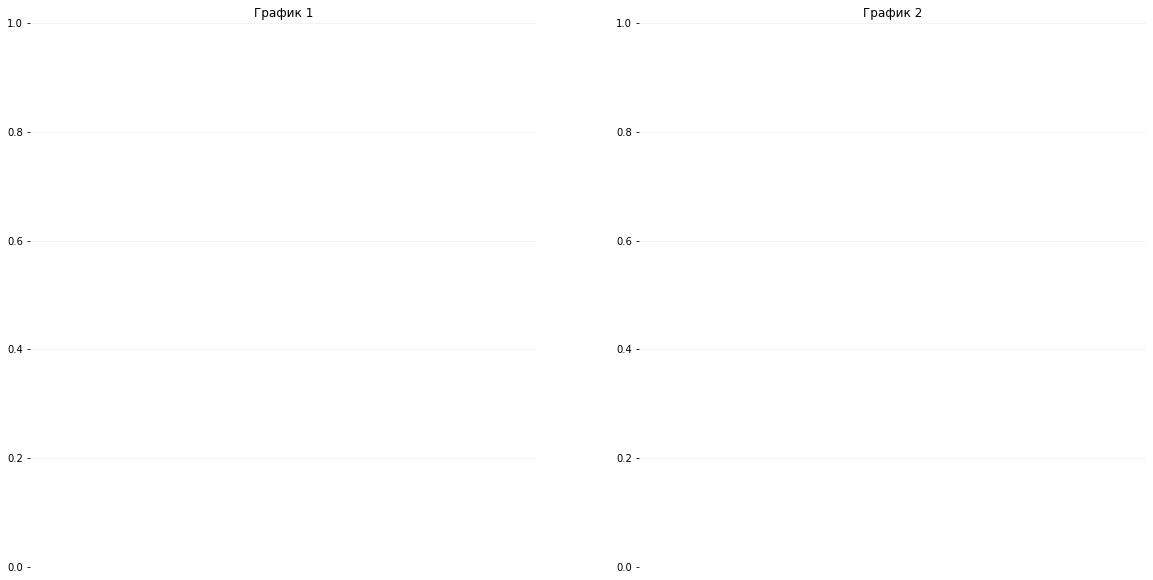

In [80]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10), sharey='col', sharex=True)

ax.plot(avocado_chicago_organic_price.rolling(4).mean(), color='coral')
ax.plot(avocado_chicago_organic_price.ewm(span=4).mean(), color='blue')

for ax in axes.flatten():
    # удаляем рамку
    ax.set_frame_on(False)  
    # устанавливаем major locator – 4 января для каждого года
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=1, bymonthday=4))  
    # показывать в формате сокращенного названия месяца и дня (Jan 04)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    # под major locator - minor locator, т.е. редактируем minor ticks
    ax.xaxis.set_minor_locator(mdates.YearLocator(month=1, day=1))
    # показываем год
    ax.xaxis.set_minor_formatter(mdates.DateFormatter('\n%Y'))
    # делаем сетку графика совсем немного серой и наполовину прозрачной
    ax.grid(True, color='#e2e2e2', alpha=0.5)

for name, ax in zip(['1','2'], axes.flatten()):
    ax.set(title='График {}'.format(name))
    ax.tick_params(labelbottom=True, which='both')
    
plt.show()

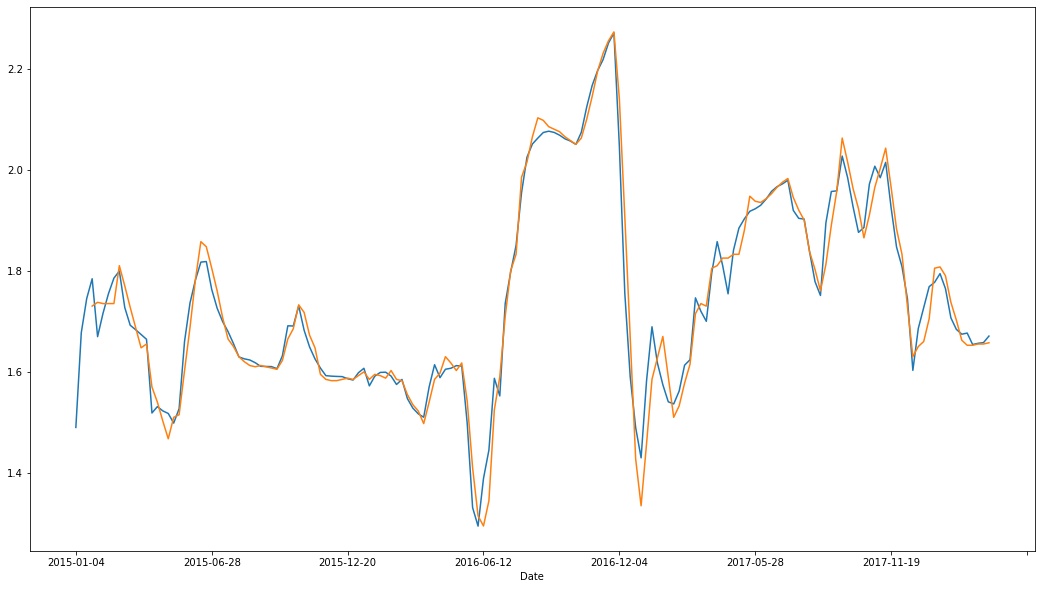

In [82]:
plt.figure(figsize=(18, 10))

avocado_chicago_organic_price.ewm(span=4).mean().plot()
avocado_chicago_organic_price.rolling(4).mean().plot()

In [93]:
avocado_chicago_organic_price.ewm(span=4).mean()['2016-08-21'].round(3)

2.062

In [92]:
avocado_chicago_organic_price.rolling(4).mean()['2016-08-21'].round(3)

2.102

In [94]:
avocado_chicago_organic_price.ewm(span=4).mean()['2017-02-19'].round(3)

1.562

In [95]:
avocado_chicago_organic_price.rolling(4).mean()['2017-02-19'].round(3)

1.532

In [96]:
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-sedelkin/practice/data/6_delays.csv')

In [101]:
df.describe

<bound method NDFrame.describe of      client_id  company_id                        delay  revenue
0         2389        4240  -1 days -14:57:48.000000000   705436
1         7614        9544  -4 days -02:14:23.000000000   859266
2         2052        2427  -0 days -06:08:57.000000000   812416
3         9635        8054  -0 days -23:40:19.000000000   162312
4         8154        5503  -1 days -13:21:53.000000000   658844
..         ...         ...                          ...      ...
259       5837        2617  -0 days -05:32:08.000000000   602129
260       2384        2364  -3 days -23:27:14.000000000   910660
261       5146        3331  -1 days -15:22:34.000000000   401137
262       7203        5532  -2 days -17:15:02.000000000   308979
263       3822        9882  -1 days -15:50:29.000000000   877773

[264 rows x 4 columns]>

In [104]:
df.delay.str.startswith('-').count()

264

In [112]:
df.delay = df.delay.str.replace('-', '').apply(pd.to_timedelta)

In [118]:
df['delay_categorical'] = pd.cut(df.delay, 3)
df

,client_id,company_id,delay,revenue,delay_categorical
0,2389,4240,1 days 14:57:48,705436,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
1,7614,9544,4 days 02:14:23,859266,"(3 days 08:05:36.333333333, 4 days 23:51:14]"
2,2052,2427,0 days 06:08:57,812416,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
3,9635,8054,0 days 23:40:19,162312,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
4,8154,5503,1 days 13:21:53,658844,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
...,...,...,...,...,...
259,5837,2617,0 days 05:32:08,602129,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
260,2384,2364,3 days 23:27:14,910660,"(3 days 08:05:36.333333333, 4 days 23:51:14]"
261,5146,3331,1 days 15:22:34,401137,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
262,7203,5532,2 days 17:15:02,308979,"(1 days 16:19:58.666666666, 3 days 08:05:36.33..."


In [113]:
??pd.cut

In [129]:
# Catergorise values by sorting them into bins with fixed and named boundaries

cut_bins = [pd.Timedelta(0, 'd'), pd.Timedelta(1, 'd'), pd.Timedelta(2, 'd'), pd.Timedelta(3, 'd'), pd.Timedelta(10000, 'd')]
cut_labels = ['less than 1 day', '1-2 days', '2-3 days', 'more than 3 days']
df['delay_categorical'] = pd.cut(df.delay, bins=cut_bins, labels=cut_labels)  

df

,client_id,company_id,delay,revenue,delay_categorical
0,2389,4240,1 days 14:57:48,705436,1-2 days
1,7614,9544,4 days 02:14:23,859266,more than 3 days
2,2052,2427,0 days 06:08:57,812416,less than 1 day
3,9635,8054,0 days 23:40:19,162312,less than 1 day
4,8154,5503,1 days 13:21:53,658844,1-2 days
...,...,...,...,...,...
259,5837,2617,0 days 05:32:08,602129,less than 1 day
260,2384,2364,3 days 23:27:14,910660,more than 3 days
261,5146,3331,1 days 15:22:34,401137,1-2 days
262,7203,5532,2 days 17:15:02,308979,2-3 days


In [133]:
df.groupby('delay_categorical', as_index=False).
px.countplot(df, x='delay_categorical')


AttributeError: module 'plotly.express' has no attribute 'countplot'